## 1A & B

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

df = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi", decimal=',', thousands=' ')[5]
df.rename(columns={"Unnamed: 0": "År"}, inplace=True)


fig = px.bar(
    df,
    x="År",
    y="Total fertilitet",
    labels={"year": "Year", "pop": "Population"},
    title="Swedish Population every 5 year"
)  # behöver inte skriva 'data=' här som man behöver med seaborn
fig.show()

In [3]:
fig = px.bar(
    df,
    x="År",
    y="Döda",
    labels={"year": "Year", "pop": "Population"},
    title="Swedish Population every 5 year"
)  # behöver inte skriva 'data=' här som man behöver med seaborn
fig.show()

<AxesSubplot: xlabel='År', ylabel='Total fertilitet'>

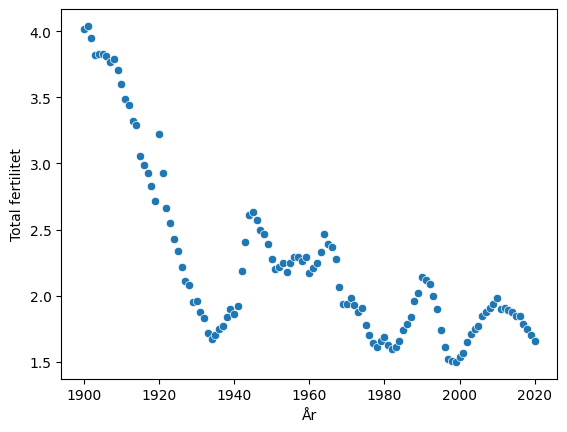

In [4]:
sns.scatterplot(data=df, x="År", y="Total fertilitet")

In [5]:
fig = px.density_heatmap(
    df,
    x="År",
    y="Naturlig befolkningsförändring",
    labels={"year": "Year", "pop": "Population"},
    title="Naturlig befolkningsförändring i procent%"
)  # behöver inte skriva 'data=' här som man behöver med seaborn
fig.show()

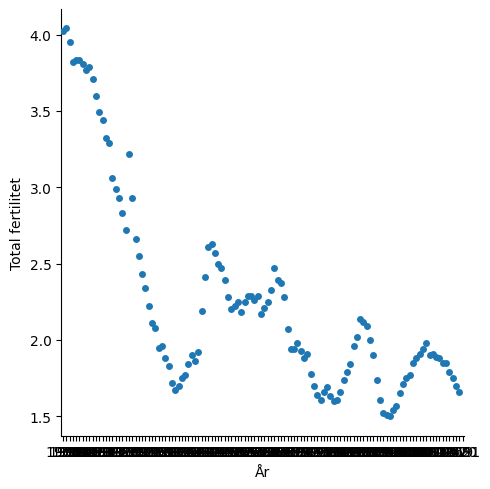

In [6]:
sns.catplot(data=df, x="År", y="Total fertilitet")

In [7]:
fig = px.density_contour(
    df,
    x="År",
    y="Naturlig befolkningsförändring",
    labels={"year": "Year", "pop": "Population"},
    title="Naturlig befolkningsförändring i procent%"
)  # behöver inte skriva 'data=' här som man behöver med seaborn
fig.show()

## 1C

In [8]:
swe_old = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi", thousands= " ", match = "Vid utgången av år", header = 1, skiprows=[9, 10, 11, 12])[0]
swe_old.pop("Totalt")
swe_old.pop("Promille")

swe_old.rename(columns={"Vid utgången av år": "År"}, inplace= True)

#swe_old["Folkmängd"].astype(float)
len(swe_old)
#swe_old.drop(["1900", "2000", "2020", "Datan avser folkmängden inom Sveriges nuvarande gränser."], inplace=True)
#swe_old.drop([7, 8, 9, 10], inplace=True) # Used skip rows instead when we read in data for same result


#swe_old.set_index("År", inplace=True)
swe_old["Folkmängd"][2]

'1\xa0485\xa0000'

In [13]:
df_old = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi", thousands= " ", match = "Vid utgången av år", header = 1, skiprows=[9, 10, 11, 12])[0]
df_old.pop("Totalt")
df_old.pop("Promille")
# df_old["År"] = df_old["År"].astype(float)
# df_old["Folkmängd"] = df_old["Folkmängd"].astype(int)

# df_old["Folkmängd"][0] = df_old["Folkmängd"][0].replace(u'\xa0', u'')
# df_old["Folkmängd"][1] = df_old["Folkmängd"][1].replace(u'\xa0', u'')
# df_old["Folkmängd"][2] = df_old["Folkmängd"][2].replace(u'\xa0', u'')
# df_old["Folkmängd"][3] = df_old["Folkmängd"][3].replace(u'\xa0', u'')
# df_old["Folkmängd"][4] = df_old["Folkmängd"][4].replace(u'\xa0', u'')
# df_old["Folkmängd"][5] = df_old["Folkmängd"][5].replace(u'\xa0', u'')
# df_old["Folkmängd"][6] = df_old["Folkmängd"][6].replace(u'\xa0', u'')

df_old['Folkmängd'] = df_old['Folkmängd'].apply(lambda x: int(x.replace(u'\xa0','')))

# df_old["Folkmängd"] = df_old["Folkmängd"].astype(float)
# df_old["Vid utgången av år"] = df_old["Vid utgången av år"].astype(float)

df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Vid utgången av år  7 non-null      int64
 1   Folkmängd           7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [ ]:
merged_data = pd.concat([df, df_old])
merged_data["År"] = merged_data["År"].astype(float)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 6
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   År                                         122 non-null    float64
 1   Medel- folkmängd                           122 non-null    float64
 2   Födda                                      122 non-null    float64
 3   Döda                                       122 non-null    float64
 4   Naturlig befolkningsförändring             122 non-null    float64
 5   Nativitet (per 1000)                       122 non-null    float64
 6   Dödstal (per 1000)                         122 non-null    float64
 7   Naturlig befolkningsförändring (per 1000)  122 non-null    float64
 8   Total fertilitet                           121 non-null    float64
 9   (År, År)                                   7 non-null      object 
 10  (Folkmängd, Folkmängd)      